# HIV Heterogeneous

$\lambda(t) = c * \beta *\frac{I(t)}{S(t) + I(t)}$

$\dot{S(t)} = -\lambda * S(t) + \gamma * I(t) - m * I(t)$

$\dot{I(t)} = \gamma * I(t) - (\mu + m) * I(t)$


With variables:

* $S$: Susceptibles
* $I$: Infective
* $A$: AIDS
* $\beta$: Transmission probability per partnership
* $r$: Recovery rate
* $c$: Partner change rate
* $\gamma$: 1/duration of infectiousness
* $\mu$: 1/duration of AIDS
* $m$: background death rate
* $\alpha$: population growth rate

In [5]:
import aux
import model
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 5]

In [7]:
(N, Inf0, tmax) = (10000, 1, 100 * 12)
(cH, cL) = (8/12, 0.2/12)
(alpha, beta, newH) = (0.025/12, .05, 0.15)
(gam, mu, m) = (1/(9*12), 1/(1*12), 1/(35*12))
newL = 1-newH
# Run
(SH, SL, IH, IL, AH, AL, DH, DL) = (
        newH*N - Inf0,  N-(newH*N), Inf0, 0, 0, 0, 0, 0
    )

t = np.linspace(0, tmax, tmax * 10)
y0 = (SH, SL, IH, IL, AH, AL, DH, DL)
ret = odeint(
        model.dHIVHeterogeneous, y0, t,
        args=(N, cH, cL, newH, newL, alpha, m, beta, gam, mu)
    )
(SH, SL, IH, IL, AH, AL, DH, DL) = ret.T
# Calculate Prevalence
PREV = (IH+IL+AH+AL)/(SH+IH+AH+SL+IL+AL)
PREV_H = (IH+AH)/(SH+IH+AH)
PREV_L = (IL+AL)/(SL+IL+AL)

# Plot Population

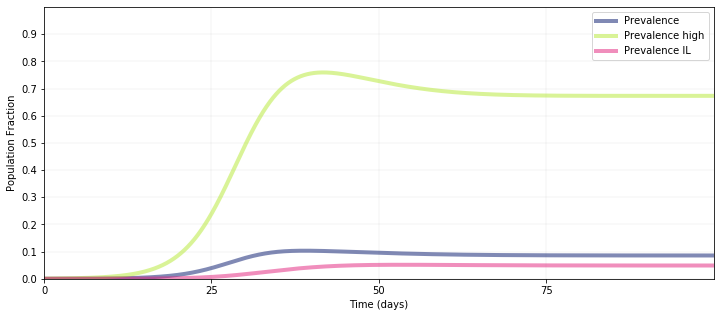

In [8]:
# Plot SIA ####################################################################
tp = (
        (PREV,      '#02146b', 'Prevalence'),
        (PREV_H,    '#b4e830', 'Prevalence high'),
        (PREV_L,    '#e21e7b', 'Prevalence IL')
    )
(fig, ax) = aux.plotEpiDynamics(tp, t/12, tmax/12, 1, ymax=.3)
ax.set_xticks(np.arange(0, tmax/12, 25))
ax.set_yticks(np.arange(0, 1, .1))
ax.set_ylim(0, 1)
plt.grid(b=True, which='major', lw=.2, alpha=.5,
         color='#666666', linestyle='--')